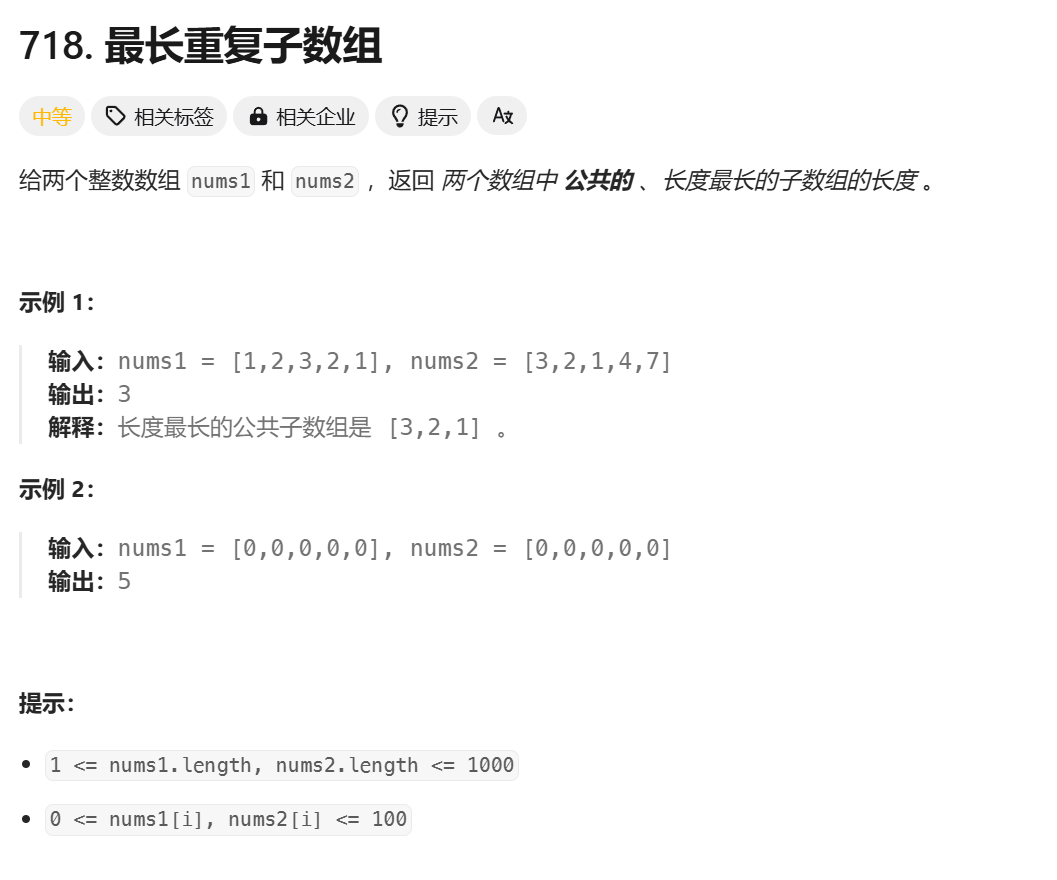

动态规划（Dynamic Programming，简称DP）是一种算法设计方法，主要用于解决具有**重叠子问题**（overlapping subproblems）和**最优子结构**（optimal substructure）性质的问题。

### 核心思想

1. **重叠子问题：**
   - 许多问题可以被分解为相同的子问题，且这些子问题会被多次计算。动态规划通过将这些重复计算的子问题结果存储起来（通常使用表格或数组），从而避免重复计算，提升算法效率。
   
2. **最优子结构：**
   - 一个问题的最优解可以通过其子问题的最优解构建而成。换句话说，问题的全局最优解依赖于其子问题的最优解。

### 动态规划与递归的区别

- **递归：** 一般直接通过函数调用来自上而下地解决问题，每次需要重新计算子问题，可能会有大量重复计算。
- **动态规划：** 动态规划自下而上（或自上而下结合记忆化存储）的方式来解决问题。通过存储子问题的解（通常在数组或表格中），减少了重复计算。

### 动态规划的步骤

1. **定义状态：**
   - 首先要明确要解决的问题以及该问题的子问题。定义一个数组或表格来存储子问题的解。

2. **状态转移方程：**
   - 找出当前问题与子问题之间的关系，即如何从子问题的解推导出当前问题的解。这通常是通过状态转移方程来表达。

3. **初始化：**
   - 初始化表格或数组，通常是将最基本的子问题（边界条件）初始化为已知值。

4. **填表：**
   - 按照状态转移方程，自底向上（或者自顶向下结合记忆化存储）填充表格，直到最终解被求出。

### 例子：斐波那契数列

斐波那契数列的递推公式为：`F(n) = F(n-1) + F(n-2)`，我们可以使用动态规划来计算它。

#### 递归实现：
```python
def fib(n):
    if n <= 1:
        return n
    return fib(n-1) + fib(n-2)
```

这种方式的时间复杂度是 `O(2^n)`，因为它重复计算了许多子问题。

#### 动态规划实现：
```python
def fib(n):
    if n <= 1:
        return n
    dp = [0] * (n + 1)
    dp[1] = 1
    for i in range(2, n + 1):
        dp[i] = dp[i-1] + dp[i-2]
    return dp[n]
```

通过动态规划，我们将时间复杂度优化到了 `O(n)`，并且避免了重复计算。

### 总结

动态规划是一种在解决复杂问题时非常有效的工具，尤其是在问题具有重叠子问题和最优子结构时。它通过记忆化存储已经计算的子问题结果，从而减少重复计算，大大提高了算法效率。

你提到的原始方案的确在最坏情况下，时间复杂度也是 \( O(M \times N) \)（其中 \( M \) 是 `nums1` 的长度，\( N \) 是 `nums2` 的长度）。但是，尽管两者的时间复杂度相同，动态规划方法在实际运行时的效率通常会更高，原因如下：

### 原方案的时间复杂度分析

在原方案中，你使用了两个嵌套的循环来遍历 `nums1` 和 `nums2`，每次找到一个相同的元素之后，还会进行一个内层的循环来扩展相等的子数组。这种方法的最坏时间复杂度确实是 \( O(M \times N) \)，因为每个 `i` 对应每个 `j` 都会进行比较。但因为你每次都需要重新计算相同的子数组，并且在外层循环中重新初始化某些变量，这可能会导致更多的操作次数，尤其是在元素相同或相近时，效率会变得更低。

### 动态规划解法的优势

1. **避免重复计算：**
   - 动态规划通过一个二维数组 `dp` 来存储已经计算过的子问题结果。每个 `dp[i][j]` 只需要计算一次，并且计算 `dp[i][j]` 时不需要再从头开始比较，而是可以直接使用 `dp[i-1][j-1]` 的结果进行加速。

2. **操作简化：**
   - 动态规划方法将每次的比较和状态更新简化为一个赋值操作 `dp[i][j] = dp[i-1][j-1] + 1`，避免了重复的内层循环。

3. **时间复杂度同为 \( O(M \times N) \)，但常数因素更优：**
   - 虽然两个方法的时间复杂度都是 \( O(M \times N) \)，但动态规划方法的常数时间更小，因为它避免了不必要的多次循环和变量重置。

### 总结

尽管两者的时间复杂度都是 \( O(M \times N) \)，动态规划解法在实际操作上更高效，尤其是在处理较大的数据集时表现更好。这是因为动态规划避免了重复计算，操作更简洁，处理过程更有序。

In [ ]:
from typing import List

class Solution:
    def findLength(self, nums1: List[int], nums2: List[int]) -> int:
        size1, size2 = len(nums1), len(nums2)
        # 创建一个 (size1+1) x (size2+1) 的 DP 表，初始全为0
        dp = [[0] * (size2 + 1) for _ in range(size1 + 1)]
        max_len = 0
        
        # 填充 DP 表
        for i in range(1, size1 + 1):
            for j in range(1, size2 + 1):
                if nums1[i - 1] == nums2[j - 1]:
                    dp[i][j] = dp[i - 1][j - 1] + 1
                    max_len = max(max_len, dp[i][j])
        
        return max_len
